# Diwali Sales Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [13]:
df = pd.read_csv('Diwali_Sales_Data.csv', encoding='unicode_escape') # toavoid unicodedecodeError, use encoding=unicode_escape

In [14]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [15]:
df.shape

(11251, 15)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [ ]:
# Drop the columns having no values.
df=df.drop(['Status','unnamed1'], axis =1 , inplace= True)

In [22]:
df

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370.0
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367.0
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213.0
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206.0


In [24]:
# Check for null values
df.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [38]:
df[df['Amount'].isnull()]

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
7,1002092,Shivangi,P00273442,F,55+,61,0,Maharashtra,Western,IT Sector,Auto,1,NaN
14,1003858,Cano,P00293742,M,46-50,46,1,Madhya Pradesh,Central,Hospitality,Auto,3,NaN
16,1005447,Amy,P00275642,F,46-50,48,1,Andhra Pradesh,Southern,IT Sector,Auto,3,NaN
109,1005265,Sakshi,P00296242,F,46-50,48,1,Delhi,Central,Banking,Footwear & Shoes,1,NaN
111,1005261,Apoorva,P00057942,F,36-45,41,1,Delhi,Central,IT Sector,Footwear & Shoes,2,NaN
184,1005538,Kartik,P00269542,F,46-50,49,1,Karnataka,Southern,Banking,Footwear & Shoes,1,NaN
293,1000326,Jonathan,P00120542,M,51-55,53,0,Gujarat,Western,IT Sector,Footwear & Shoes,3,NaN
344,1002507,Lakshmi,P00045842,F,26-35,35,1,Gujarat,Western,Chemical,Furniture,1,NaN
345,1004498,Srishti,P00030842,F,51-55,55,0,Delhi,Central,Textile,Footwear & Shoes,1,NaN
452,1004601,Gaurav,P00014442,F,36-45,40,1,Madhya Pradesh,Central,Hospitality,Food,4,NaN


In [42]:
#We need to drop these rows
df.dropna(inplace=True)

In [43]:
df.shape

(11239, 13)

In [45]:
df.dtypes

User_ID               int64
Cust_name            object
Product_ID           object
Gender               object
Age Group            object
Age                   int64
Marital_Status        int64
State                object
Zone                 object
Occupation           object
Product_Category     object
Orders                int64
Amount              float64
dtype: object

In [46]:
df.head(3)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0


In [47]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610858
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355869
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [50]:
# Only Age, Orders and Amount is relevant here,

df[['Age','Orders','Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610858
std,12.753866,1.114967,5222.355869
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


### Gender

<AxesSubplot:xlabel='Gender', ylabel='count'>

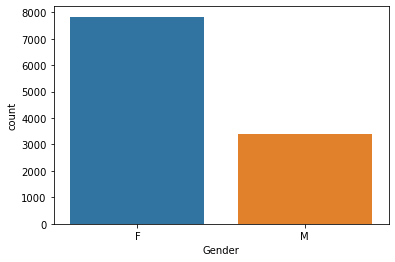

In [52]:
# Analyze the gender first

sns.countplot(data=df, x= "Gender")

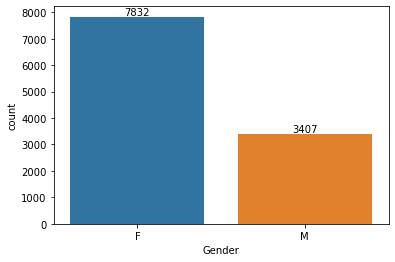

In [55]:
# For data lebeling
count=sns.countplot(data=df, x= "Gender")
for bars in count.containers:
    count.bar_label(bars)
    

In [57]:
# Conclusion:- Women have done more purchases than men

In [58]:
df['Gender'].value_counts()

F    7832
M    3407
Name: Gender, dtype: int64

In [99]:
#Purchase Amount made by both the genders

df[['Gender', 'Amount']].groupby(['Gender'],as_index=False).sum()

,Gender,Amount
0,F,74335856.43
1,M,31913276.00


In [100]:
gender_data= df[['Gender', 'Amount']].groupby(['Gender'],as_index=False).sum()

In [96]:
sum_amount_male= df[df['Gender']=="M"][['Amount']].sum()
sum_amount_female= df[df['Gender']=="F"][['Amount']].sum()

In [97]:
print(sum_amount_male)
print(sum_amount_female)

Amount    31913276.0
dtype: float64
Amount    74335856.43
dtype: float64


In [101]:
# Now lets plot the bargraph for the data

<AxesSubplot:xlabel='Gender', ylabel='Amount'>

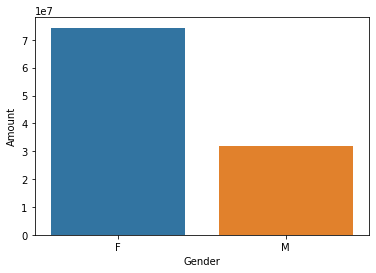

In [102]:
sns.barplot(data=gender_data,x="Gender",y="Amount")

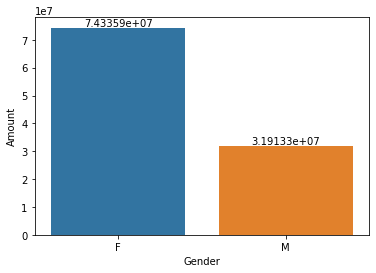

In [106]:
# For data lebeling
count=sns.barplot(data=gender_data,x="Gender",y="Amount")
for bars in count.containers:
    count.bar_label(bars)
    

In [81]:
# Conclusion:- Women have done purchase of more amount as compared to men 

### Age Group

In [108]:
df.head(2)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0


In [122]:
df[['Age Group']].value_counts()

Age Group
26-35        4541
36-45        2283
18-25        1879
46-50         983
51-55         830
55+           427
0-17          296
dtype: int64

<AxesSubplot:xlabel='Age Group', ylabel='count'>

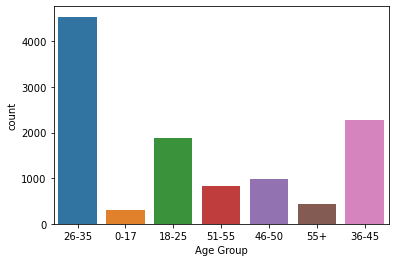

In [113]:
sns.countplot(data=df, x= "Age Group")

In [114]:
#Conclusion:- Maximum number of people making purchases are from 26-35 years age group.

<AxesSubplot:xlabel='Age Group', ylabel='count'>

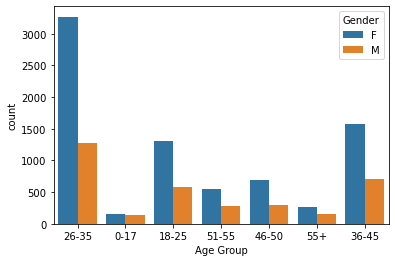

In [115]:
sns.countplot(data=df,x="Age Group",hue = "Gender")

In [116]:
#Conclusion:- Out of 26-35 years age group, females are doing more purchases.

In [118]:
# Age Group Vs Amount
age_data = df[['Age Group', 'Amount']].groupby(['Age Group'],as_index=False).sum()
age_data

,Age Group,Amount
0,0-17,2699653.00
1,18-25,17240732.00
2,26-35,42613443.94
3,36-45,22144995.49
4,46-50,9207844.00
5,51-55,8261477.00
6,55+,4080987.00


<AxesSubplot:xlabel='Age Group', ylabel='Amount'>

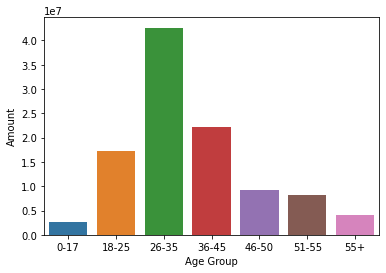

In [119]:
sns.barplot(data=age_data, x= 'Age Group', y='Amount')

In [120]:
#Conclusion:- Maximum amount purchases are made by people from 26-35 years age group.

### Age

In [121]:
df['Age'].describe()

count    11239.000000
mean        35.410357
std         12.753866
min         12.000000
25%         27.000000
50%         33.000000
75%         43.000000
max         92.000000
Name: Age, dtype: float64

In [124]:
df['Age'].min()

12

In [125]:
df['Age'].max()

92

In [126]:
df.head(3)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0


### State

In [146]:
# Orders from different states
df.groupby('State').sum().Orders

State
Andhra Pradesh      2051
Bihar               1062
Delhi               2740
Gujarat             1066
Haryana             1109
Himachal Pradesh    1568
Jharkhand            953
Karnataka           3240
Kerala              1137
Madhya Pradesh      2252
Maharashtra         3810
Punjab               495
Rajasthan            555
Telangana            312
Uttar Pradesh       4807
Uttarakhand          824
Name: Orders, dtype: int64

In [150]:
state_orders = df[['State','Orders']].groupby(['State'], as_index=False).sum()
state_orders

,State,Orders
0,Andhra Pradesh,2051
1,Bihar,1062
2,Delhi,2740
3,Gujarat,1066
4,Haryana,1109
5,Himachal Pradesh,1568
6,Jharkhand,953
7,Karnataka,3240
8,Kerala,1137
9,Madhya Pradesh,2252


<AxesSubplot:xlabel='State', ylabel='Orders'>

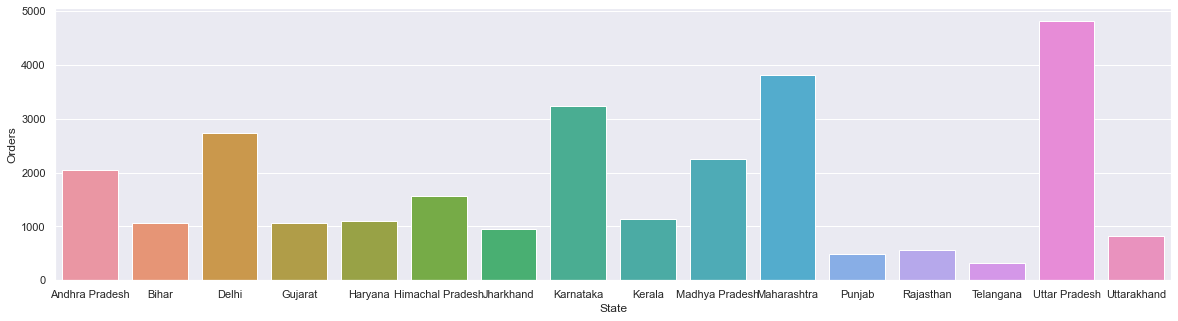

In [154]:
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data=state_orders, x= "State", y = "Orders")

In [161]:
sorted_data= state_orders = df[['State','Orders']].groupby(['State'], as_index=False).sum().sort_values(by="Orders", ascending=False)
sorted_data

,State,Orders
14,Uttar Pradesh,4807
10,Maharashtra,3810
7,Karnataka,3240
2,Delhi,2740
9,Madhya Pradesh,2252
0,Andhra Pradesh,2051
5,Himachal Pradesh,1568
8,Kerala,1137
4,Haryana,1109
3,Gujarat,1066


<AxesSubplot:xlabel='State', ylabel='Orders'>

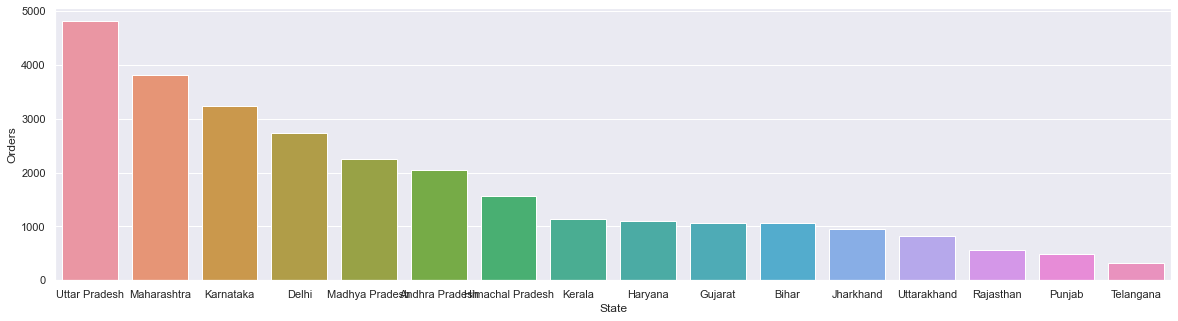

In [163]:
#sns.set(rc={'figure.figsize':(20,5)}
sns.barplot(data=sorted_data, x="State",y ="Orders")

In [155]:
# Conclusion:- Maximum orders are from Uttar Pradesh

### Marital Status

In [167]:
df[['Marital_Status']].value_counts()

Marital_Status
0                 6518
1                 4721
dtype: int64

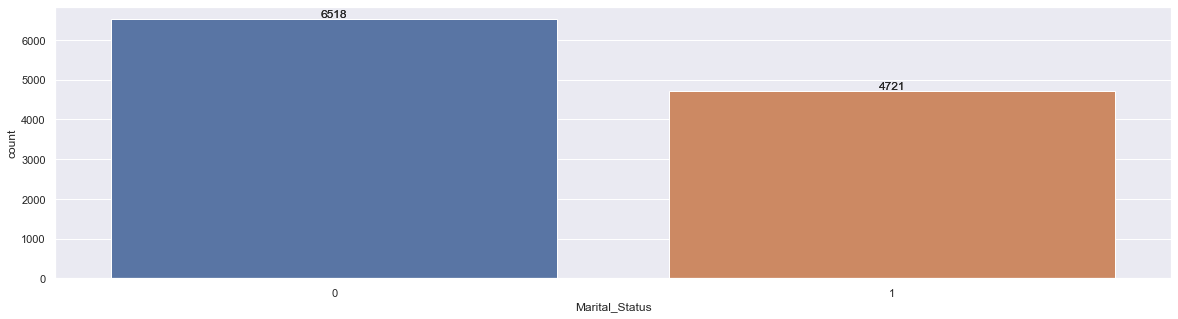

In [170]:
# Plot the bar graph for the same
sns.countplot(data=df,x="Marital_Status")
ax=sns.countplot(data=df, x="Marital_Status")
for bars in ax.containers:
    ax.bar_label(bars)
    

In [182]:
# 1 for married
# 0 for Unmarried

In [178]:
# Conculsion:- Most of the buyers are Unmarried people.

### Occupation

In [194]:
df.head(3)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0


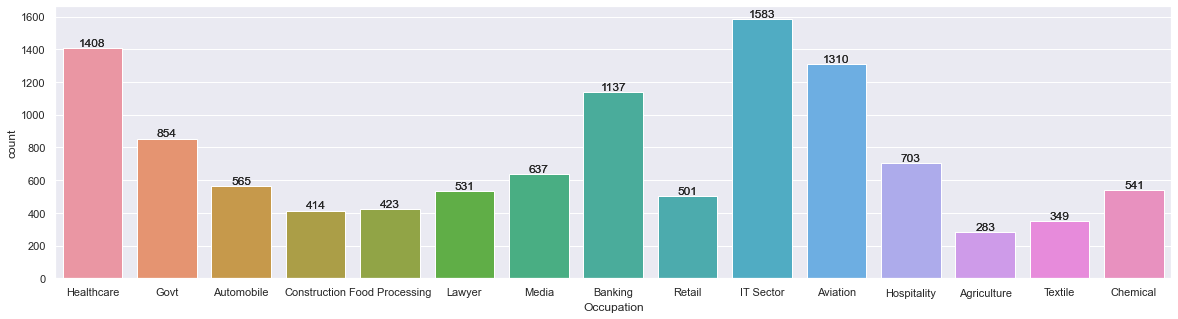

In [197]:
sns.countplot(data=df,x="Occupation")
count=sns.countplot(data=df, x="Occupation")
for bars in count.containers:
    count.bar_label(bars)

In [201]:
# Occupation Vs Amount of purchase
occu_data = df[['Occupation', 'Amount']].groupby(['Occupation'],as_index=False).sum().sort_values(by='Amount',ascending=False)
occu_data

,Occupation,Amount
10,IT Sector,14755079.00
8,Healthcare,13034587.49
2,Aviation,12602298.00
3,Banking,10770610.95
7,Govt,8517212.00
9,Hospitality,6376405.00
12,Media,6295832.99
1,Automobile,5368596.00
4,Chemical,5297436.00
11,Lawyer,4981665.00


<AxesSubplot:xlabel='Occupation', ylabel='Amount'>

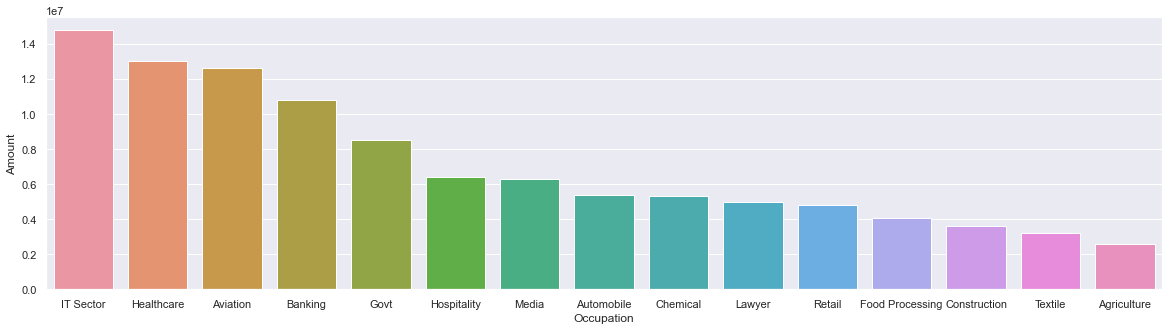

In [202]:
sns.barplot(data=occu_data, x='Occupation', y='Amount')

In [203]:
# Conclusion;- Maximum purchase are made by people working in IT Sector followed by Healthcare and Aviation sector.

In [204]:
df.head(3)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0


### Product_Category

In [206]:
df['Product_Category'].value_counts()

Clothing & Apparel       2655
Food                     2490
Electronics & Gadgets    2087
Footwear & Shoes         1059
Household items           520
Beauty                    422
Games & Toys              386
Sports Products           356
Furniture                 352
Pet Care                  212
Office                    113
Stationery                112
Books                     103
Auto                       97
Decor                      96
Veterinary                 81
Tupperware                 72
Hand & Power Tools         26
Name: Product_Category, dtype: int64

<AxesSubplot:xlabel='Product_Category', ylabel='count'>

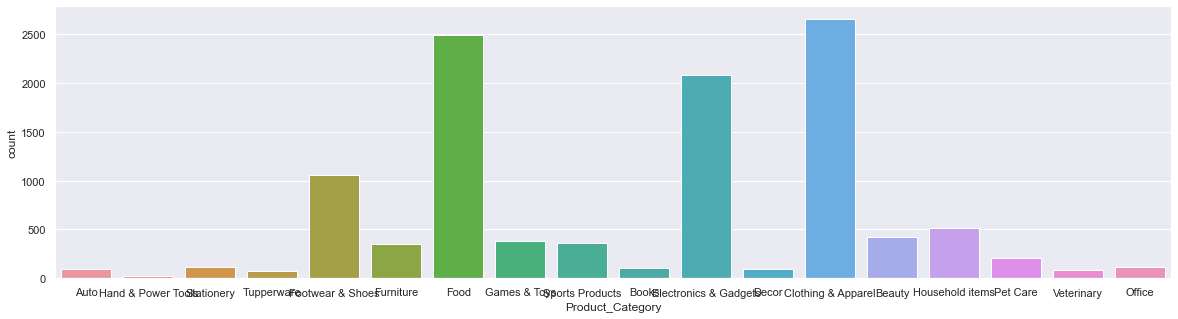

In [209]:
sns.countplot(data=df, x='Product_Category')

In [ ]:
# Conclusion:- Based on qunatity, Clothing and Apparel has most buyers in Product category.

In [213]:
# Compare with Amount
prod_data = df[['Product_Category','Amount']].groupby(['Product_Category'],as_index=False).sum().sort_values(by='Amount',ascending=False).head(10)
prod_data

,Product_Category,Amount
6,Food,33933883.50
3,Clothing & Apparel,16495019.00
5,Electronics & Gadgets,15643846.00
7,Footwear & Shoes,15575209.45
8,Furniture,5440051.99
9,Games & Toys,4331694.00
14,Sports Products,3635933.00
1,Beauty,1959484.00
0,Auto,1958609.99
15,Stationery,1676051.50


<AxesSubplot:xlabel='Product_Category', ylabel='Amount'>

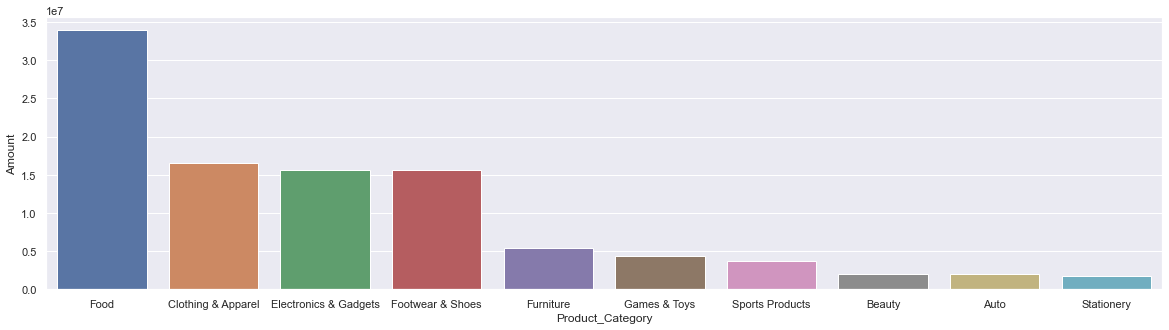

In [214]:
sns.barplot(data=prod_data, x='Product_Category', y='Amount')

In [215]:
# Conclusion:- Based on Amount, Food has most buyers in product category.

### Conclusions:-

    1. Unmarried Women from age group of 26-35 are highest purchasers.
    2. Most of the buyers are from UP, Maharashtra and Karnataka.
    3. Maximum purchases are made by people working in IT Sector followed by Healthcare and Aviation.
    4. Clothing&Apparel, Food and Electronics&Gadgets are top sold products.
